In [3]:
import pandas as pd

In [6]:
hr_dt=pd.read_csv(r'D:\data science and deepl learning 20 case studies\datascienceforbusiness-master\hr_data.csv')

In [7]:
#View the Top 5 rows
hr_dt.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [8]:
#view the bottom 5 rows
hr_dt.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [9]:
hr_dt.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
hr_dt.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [15]:
# To view which columns are categorical,Numerical
hr_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [16]:
# To check the number of Rows and columns
hr_dt.shape

(14999, 9)

In [20]:
# To display uniques in Categorical columns
print(hr_dt.department.unique())
print(hr_dt.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [21]:
# To display values in categorical
print(hr_dt.department.value_counts())
print(hr_dt.salary.value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


# Loading our Evaluation and Emoloyee Satisfaction Data

In [22]:
satis_dt=pd.read_excel('D:\data science and deepl learning 20 case studies\datascienceforbusiness-master\employee_satisfaction_evaluation.xlsx')

In [23]:
satis_dt.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


Merge the two data frames or Join the tables

In [24]:
main_dt=hr_dt.set_index('employee_id').join(satis_dt.set_index('EMPLOYEE #'))

In [26]:
main_dt=main_dt.reset_index()

In [27]:
main_dt.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


Lets check for the missing values?

In [28]:
main_dt.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

# Lets fill the missing values impute with the Mean

In [30]:
main_dt.mean()

employee_id              45424.627575
number_project               3.803054
average_montly_hours       201.050337
time_spend_company           3.498233
Work_accident                0.144610
left                         0.238083
promotion_last_5years        0.021268
satisfaction_level           0.612830
last_evaluation              0.716125
dtype: float64

In [32]:
main_dt.fillna(main_dt.mean(),inplace=True)

In [35]:
main_dt.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [37]:
#Lets drop the Employee id column 
main_dt_final=main_dt.drop(columns='employee_id')
main_dt_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [38]:
main_dt_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [40]:
main_dt_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [41]:
# lets check the class of Left column
main_dt_final.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

# Displaying your correlation matrix


In [42]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


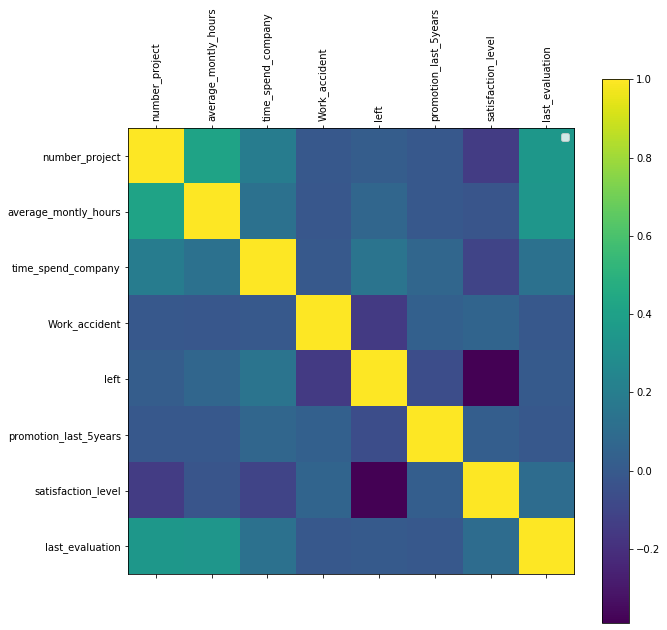

In [44]:
def plot_corr(df,size=10):
    corr=df.corr()
    fig, ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
    plt.yticks(range(len(corr.columns)),corr.columns)
    
plot_corr(main_dt_final)

# Preparing our Dataset for ML

In [45]:
#perform one hot encoding on Categorical Data

categorical=['department','salary']
main_dt_final=pd.get_dummies(main_dt_final,columns=categorical,drop_first=True)

In [46]:
main_dt_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [50]:
# Lets see how many columns we have now
print(len(main_dt_final.columns))
main_dt_final.shape

19


(14999, 19)

In [51]:
#lets prepare the dataset for machine learning
from sklearn.model_selection import train_test_split

In [52]:
# we remove the target variable 
x=main_dt_final.drop(['left'],axis=1).values
# we take the target variable in y
y=main_dt_final['left'].values

In [53]:
# split the data in to a 70:30 Train:Test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [54]:
#Normalize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [55]:
df_train=pd.DataFrame(x_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.468802,1.654371,-0.343569,-0.417279,-0.150653,1.392463,0.370051,4.204937,-0.231718,-0.230116,-0.208649,-0.24445,-0.250089,-0.610849,-0.421205,-0.475639,-0.975256,1.145890
1,-0.661253,-0.427271,-1.039524,-0.417279,-0.150653,-0.090746,-0.270856,-0.237816,-0.231718,-0.230116,-0.208649,-0.24445,-0.250089,-0.610849,-0.421205,2.102436,1.025372,-0.872684
2,0.146296,0.353345,1.048340,-0.417279,-0.150653,1.232116,1.302280,-0.237816,-0.231718,-0.230116,-0.208649,-0.24445,-0.250089,-0.610849,-0.421205,2.102436,1.025372,-0.872684
3,-1.468802,-0.547366,-0.343569,-0.417279,-0.150653,0.670902,1.418809,-0.237816,-0.231718,-0.230116,-0.208649,-0.24445,-0.250089,1.637066,-0.421205,-0.475639,1.025372,-0.872684
4,-1.468802,-1.107808,-0.343569,-0.417279,-0.150653,-0.852395,-1.494406,-0.237816,-0.231718,-0.230116,-0.208649,-0.24445,-0.250089,1.637066,-0.421205,-0.475639,1.025372,-0.872684


In [56]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-6.813189e-17,1.660999e-16,-7.073112e-16,7.147345e-16,1.365006e-15,3.134486e-14,3.442498e-14,1.261889e-15,-1.738933e-16,1.409430e-16,6.412466e-16,7.061902e-16,1.820410e-16,1.824323e-16,6.701416e-16,2.497605e-16,-3.608251e-16,5.081710e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.468802e+00,-2.108597e+00,-1.039524e+00,-4.172794e-01,-1.506528e-01,-2.095084e+00,-2.077049e+00,-2.378157e-01,-2.317181e-01,-2.301164e-01,-2.086491e-01,-2.444498e-01,-2.500885e-01,-6.108488e-01,-4.212053e-01,-4.756387e-01,-9.752560e-01,-8.726839e-01
25%,-6.612530e-01,-9.076498e-01,-3.435693e-01,-4.172794e-01,-1.506528e-01,-6.920476e-01,-9.117631e-01,-2.378157e-01,-2.317181e-01,-2.301164e-01,-2.086491e-01,-2.444498e-01,-2.500885e-01,-6.108488e-01,-4.212053e-01,-4.756387e-01,-9.752560e-01,-8.726839e-01
50%,1.462956e-01,-6.939466e-03,-3.435693e-01,-4.172794e-01,-1.506528e-01,1.497742e-01,2.046555e-02,-2.378157e-01,-2.317181e-01,-2.301164e-01,-2.086491e-01,-2.444498e-01,-2.500885e-01,-6.108488e-01,-4.212053e-01,-4.756387e-01,-9.752560e-01,-8.726839e-01
75%,9.538442e-01,8.737551e-01,3.523856e-01,-4.172794e-01,-1.506528e-01,8.312489e-01,8.944299e-01,-2.378157e-01,-2.317181e-01,-2.301164e-01,-2.086491e-01,-2.444498e-01,-2.500885e-01,1.637066e+00,-4.212053e-01,-4.756387e-01,1.025372e+00,1.145890e+00
max,2.568941e+00,2.174781e+00,4.528115e+00,2.396476e+00,6.637777e+00,1.552810e+00,1.651866e+00,4.204937e+00,4.315588e+00,4.345627e+00,4.792736e+00,4.090819e+00,3.998584e+00,1.637066e+00,2.374139e+00,2.102436e+00,1.025372e+00,1.145890e+00


# Let's train a Logistic Regression Model

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(x_train,y_train)

predictions=model.predict(x_test)

print(" Accuracy {0:.2f}%".format(100*accuracy_score(predictions,y_test)))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

 Accuracy 79.60%
[[3196  254]
 [ 664  386]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      3450
           1       0.60      0.37      0.46      1050

    accuracy                           0.80      4500
   macro avg       0.72      0.65      0.67      4500
weighted avg       0.78      0.80      0.78      4500



C:\Users\DINESH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Lets try a random forest clasifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model1=RandomForestClassifier()
model1.fit(x_train,y_train)

predictions1=model1.predict(x_test)

print(" Accuracy {0:.2f}%".format(100*accuracy_score(predictions1,y_test)))
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

 Accuracy 98.44%
[[3442    8]
 [  62  988]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3450
           1       0.99      0.94      0.97      1050

    accuracy                           0.98      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



C:\Users\DINESH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Lets try Deep Learning whether it makes a difference from random forest

In [64]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model2=Sequential()

model2.add(Dense(9,kernel_initializer='uniform',activation='relu',input_dim=18))
model2.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

model2.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
#display model summary and show the parameters
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [66]:
#start training our classifier model
batch_size=10
epochs= 25

history= model2.fit(x_train,y_train,
                   batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score=model2.evaluate(x_test,y_test,verbose=0)
print('test loss:',score[0])
print('test Accuracy:',score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 3s 265us/sample - loss: 0.4076 - acc: 0.8328 - val_loss: 0.2679 - val_acc: 0.9098
Epoch 2/25
10499/10499 [==============================] - 2s 238us/sample - loss: 0.2146 - acc: 0.9301 - val_loss: 0.1997 - val_acc: 0.9447
Epoch 3/25
10499/10499 [==============================] - 3s 242us/sample - loss: 0.1774 - acc: 0.9472 - val_loss: 0.1833 - val_acc: 0.9471
Epoch 4/25
10499/10499 [==============================] - 3s 242us/sample - loss: 0.1673 - acc: 0.9497 - val_loss: 0.1776 - val_acc: 0.9487
Epoch 5/25
10499/10499 [==============================] - 3s 241us/sample - loss: 0.1622 - acc: 0.9509 - val_loss: 0.1759 - val_acc: 0.9498
Epoch 6/25
10499/10499 [==============================] - 3s 263us/sample - loss: 0.1598 - acc: 0.9514 - val_loss: 0.1743 - val_acc: 0.9491
Epoch 7/25
10499/10499 [==============================] - 2s 236us/sample - loss: 0.1577 - acc: 0.9518 - val_lo

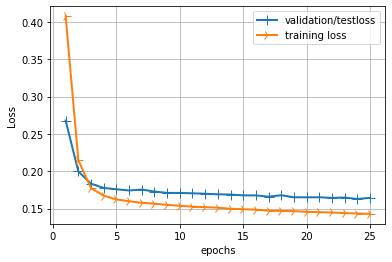

In [67]:
# plotting our loss charts

import matplotlib.pyplot as plt

history_dict=history.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='validation/testloss')
line2=plt.plot(epochs,loss_values,label='training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

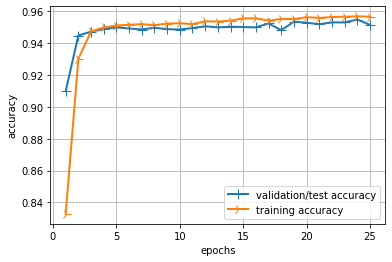

In [71]:
# plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict=history.history

acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_acc_values,label='validation/test accuracy')
line2=plt.plot(epochs,acc_values,label='training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Displaying the classification Report and confusion matrix

In [74]:
predictions2=model2.predict(x_test)
predictions2=predictions2>0.5

In [75]:
print(" Accuracy {0:.2f}%".format(100*accuracy_score(predictions2,y_test)))
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

 Accuracy 95.13%
[[3330  120]
 [  99  951]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3450
           1       0.89      0.91      0.90      1050

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500



# Lets try a deeper model

In [79]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model3=Sequential()

#Hidden layer 1
model3.add(Dense(100,activation='relu',input_dim=18,kernel_regularizer=l2(0.01)))
model3.add(Dropout(0.3,noise_shape=None,seed=None))

#Hidden Layer 2
model3.add(Dense(100,activation='relu',input_dim=18,kernel_regularizer=l2(0.01)))
model3.add(Dropout(0.3,noise_shape=None,seed=None))

model3.add(Dense(1,activation='sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               1900      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 12,101
Trainable params: 12,101
Non-trainable params: 0
_________________________________________________________________


In [80]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [81]:
#training our deeper model
batch_size=35
epochs= 25

history1= model3.fit(x_train,y_train,
                   batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score=model3.evaluate(x_test,y_test,verbose=0)
print('test loss:',score[0])
print('test Accuracy:',score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 1s 137us/sample - loss: 0.8544 - acc: 0.8447 - val_loss: 0.4025 - val_acc: 0.9338
Epoch 2/25
10499/10499 [==============================] - 1s 101us/sample - loss: 0.3420 - acc: 0.9247 - val_loss: 0.2824 - val_acc: 0.9467
Epoch 3/25
10499/10499 [==============================] - 1s 100us/sample - loss: 0.2748 - acc: 0.9401 - val_loss: 0.2532 - val_acc: 0.9491
Epoch 4/25
10499/10499 [==============================] - 1s 108us/sample - loss: 0.2515 - acc: 0.9442 - val_loss: 0.2383 - val_acc: 0.9482
Epoch 5/25
10499/10499 [==============================] - 1s 105us/sample - loss: 0.2389 - acc: 0.9466 - val_loss: 0.2300 - val_acc: 0.9500
Epoch 6/25
10499/10499 [==============================] - 1s 101us/sample - loss: 0.2316 - acc: 0.9458 - val_loss: 0.2310 - val_acc: 0.9489
Epoch 7/25
10499/10499 [==============================] - 1s 106us/sample - loss: 0.2275 - acc: 0.9485 - val_lo

In [82]:
predictions3=model3.predict(x_test)
predictions3=predictions3>0.5


print(" Accuracy {0:.2f}%".format(100*accuracy_score(predictions3,y_test)))
print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))


 Accuracy 95.31%
[[3371   79]
 [ 132  918]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3450
           1       0.92      0.87      0.90      1050

    accuracy                           0.95      4500
   macro avg       0.94      0.93      0.93      4500
weighted avg       0.95      0.95      0.95      4500



In [87]:
# Lets just check the most important features in the dataset as per Random forest classifier

feature_importance=pd.DataFrame(model1.feature_importances_,index=pd.DataFrame(x_test).columns,
                                columns=['importance']).sort_values('importance',ascending=False)

feature_importance

,importance
5,0.284768
1,0.183219
2,0.182879
0,0.182509
6,0.127861
3,0.007447
16,0.007126
13,0.004066
15,0.003342
17,0.003117
